## Install dependencies

In [ ]:
%pip install numpy cython
%pip install wheel
%pip install ir_datasets
%pip install scikit-learn
%pip install nltk
%pip install requests
%pip install matplotlib
%pip install pandas

# Importar dados para avaliação

In [59]:
import json

f = open('sira_ndcg.json')
sira_ndcg = json.load(f)

f = open('els_ndcg.json')
els_ndcg = json.load(f)

f = open('sira_fscore.json')
sira_f_score = json.load(f)

f = open('els_fscore.json')
els_f_score = json.load(f)

In [60]:
import numpy as np

def get_ids(query_ids):
    qids = []
    for key in query_ids:
        qids.append(query_ids[key])

    return qids

def get_recall_data(f_score):
    datas = []
    for key in f_score["recall"]:
        datas.append(f_score["recall"][key])

    return list(np.around(np.array(datas)*100,3))

def get_precision_data(f_score):
    datas = []
    for key in f_score["precision"]:
        datas.append(f_score["precision"][key])

    return list(np.around(np.array(datas),3))

def get_f_scores_data(f_score):
    datas = []
    for key in f_score["f_scores"]:
        datas.append(f_score["f_scores"][key])

    return list(np.around(np.array(datas)*100,3))

def get_dcg_data(dcg_score):
    datas = []
    for key in dcg_score["dcg"]:
        datas.append(dcg_score["dcg"][key])

    return list(np.around(np.array(datas),3))

def get_ndcg_data(dcg_score):
    datas = []
    for key in dcg_score["ndcg"]:
        datas.append(dcg_score["ndcg"][key])

    return list(np.around(np.array(datas),3))

## Avaliação de recall

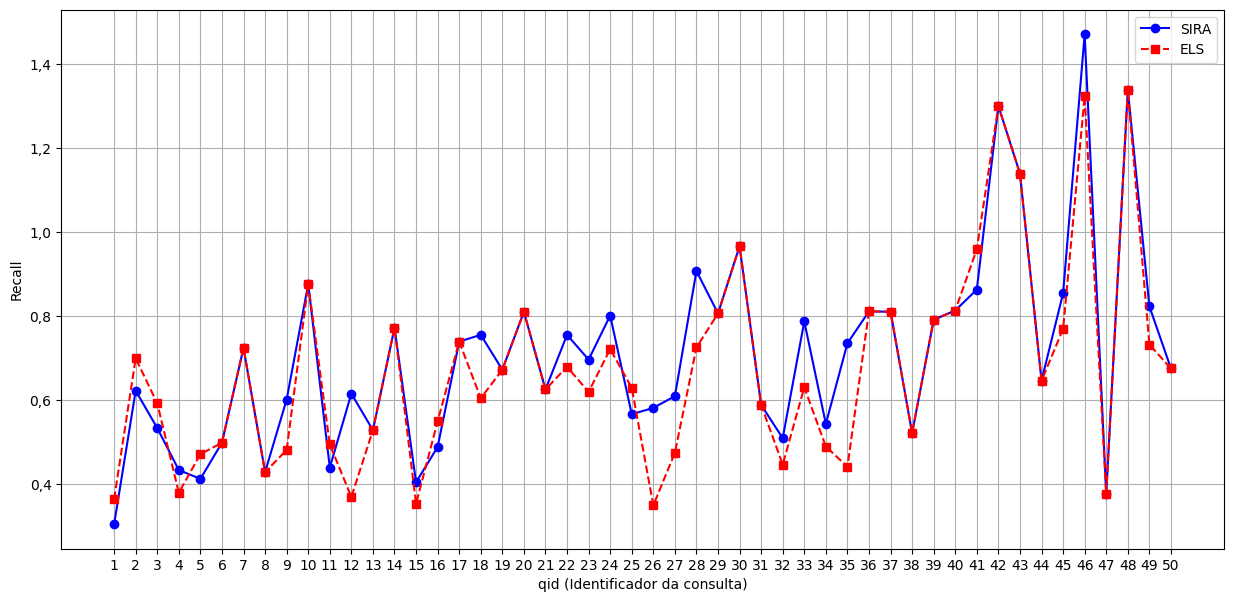

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_recall_data(sira_f_score)
els = get_recall_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Recall')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/trec_covid_recall.pdf", format="pdf")

## Avaliação da precisão

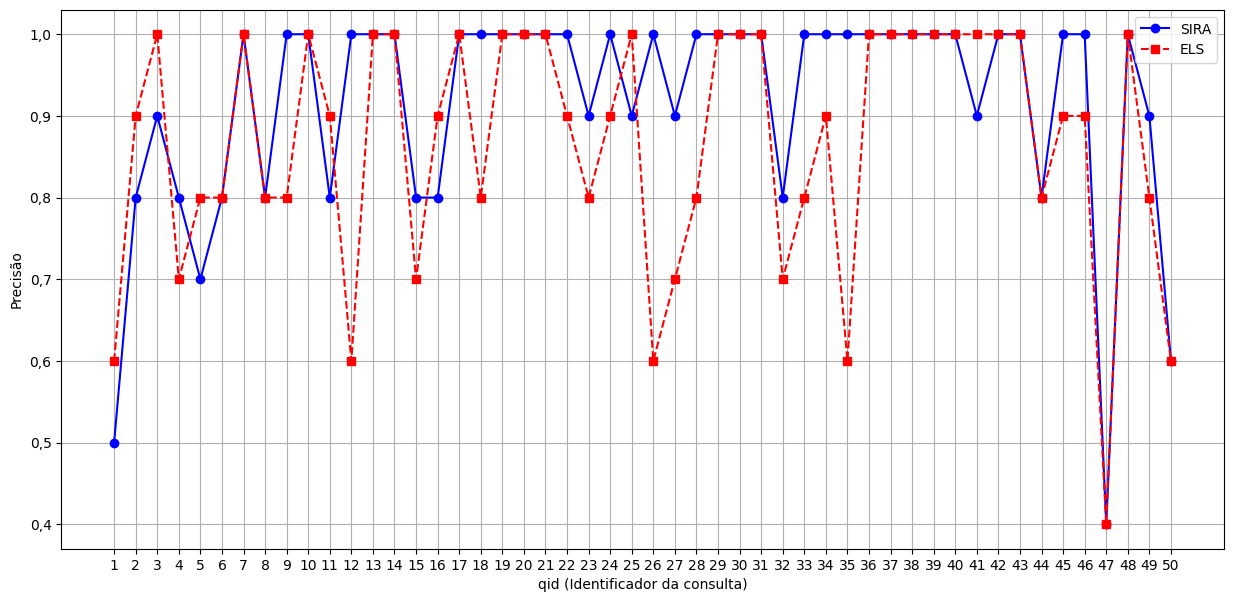

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_precision_data(sira_f_score)
els = get_precision_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Precisão')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/trec_covid_precision.pdf", format="pdf")

## Avaliação de F1

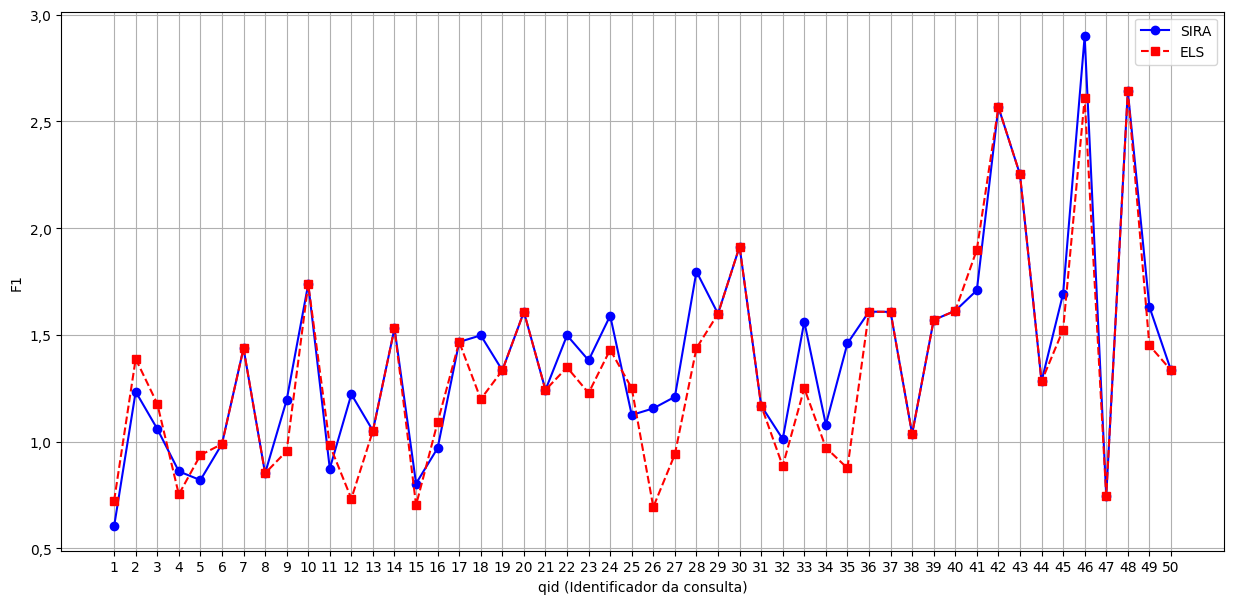

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_f_scores_data(sira_f_score)
els = get_f_scores_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/trec_covid_f1.pdf", format="pdf")

## Avaliação DCG

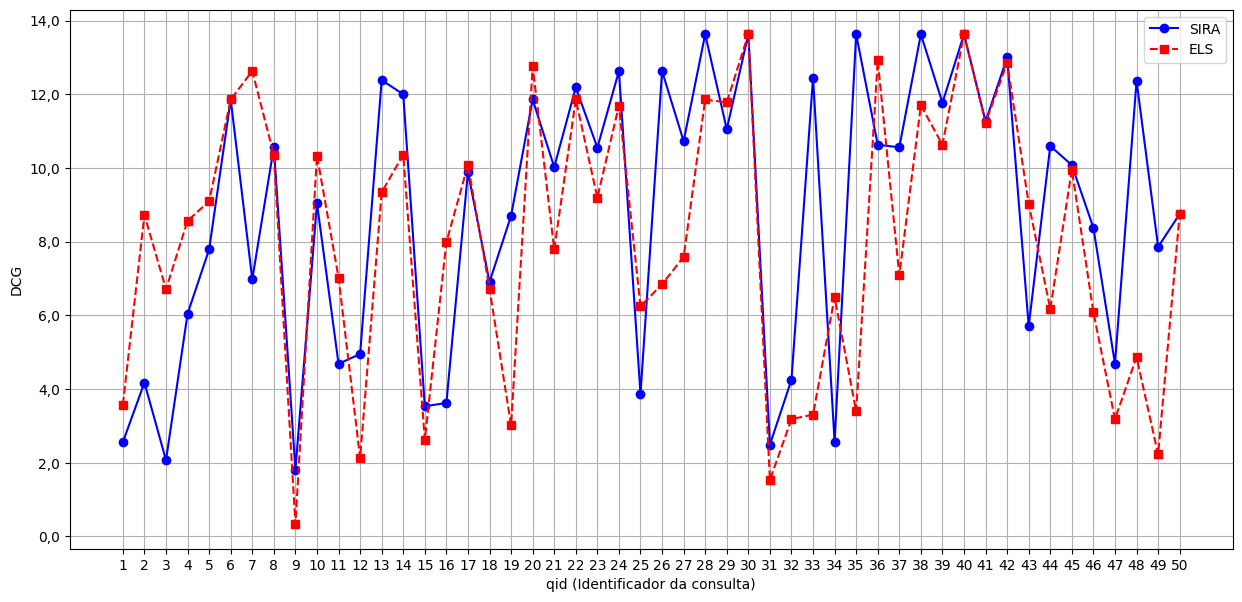

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_dcg_data(sira_ndcg)
els = get_dcg_data(els_ndcg)
list_qid = get_ids(sira_ndcg["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('DCG')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/trec_covid_dcg.pdf", format="pdf")

## Avaliação NDCG

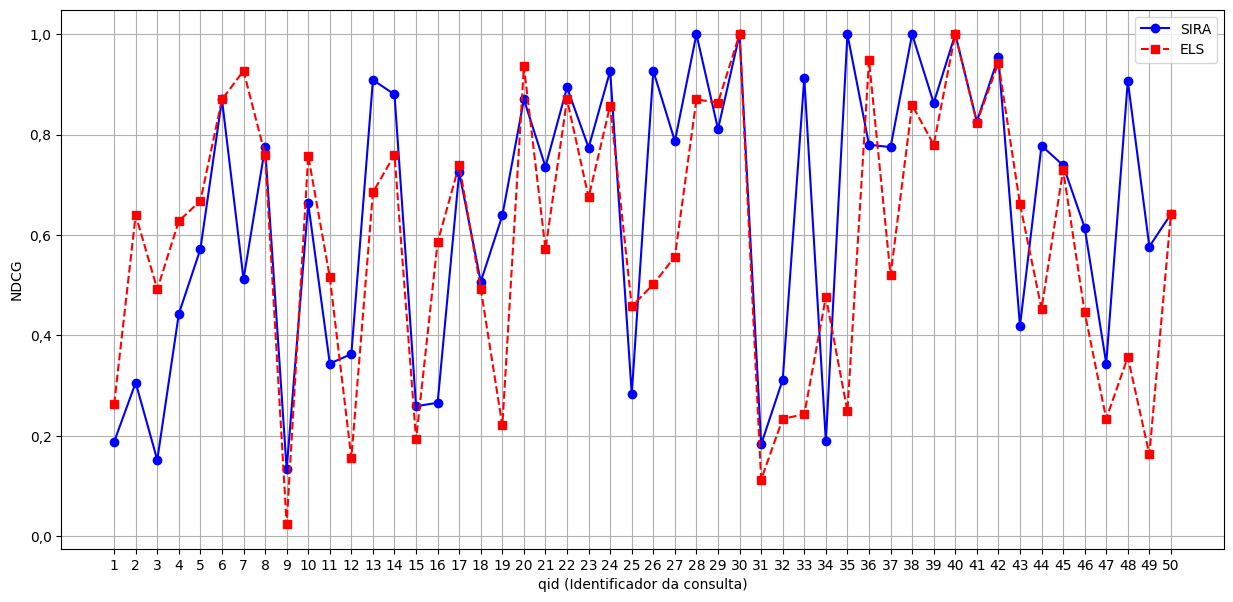

In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_ndcg_data(sira_ndcg)
els = get_ndcg_data(els_ndcg)
list_qid = get_ids(sira_ndcg["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('NDCG')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/trec_covid_ndcg.pdf", format="pdf")